In [1]:
# imports
import sys
sys.path.insert(0, '..')

import matplotlib.pyplot as plt
import pandas as pd

from src import plot_eeg

In [2]:
# load data
control_filepath = '../data/control_all.csv'
epochs_filepath = '../data/epochs_all.csv'
post_epochs_filepath = '../data/post_epochs_all.csv'

control = pd.read_csv(control_filepath)
epochs = pd.read_csv(epochs_filepath)
post_epochs = pd.read_csv(post_epochs_filepath)

In [3]:
# remove old index
control.drop('Unnamed: 0', inplace=True, axis=1)
epochs.drop('Unnamed: 0', inplace=True, axis=1)
post_epochs.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
# calc mean by group and channel
control_mean = control.mean()
epochs_mean = epochs.mean()
post_epochs_mean = post_epochs.mean()

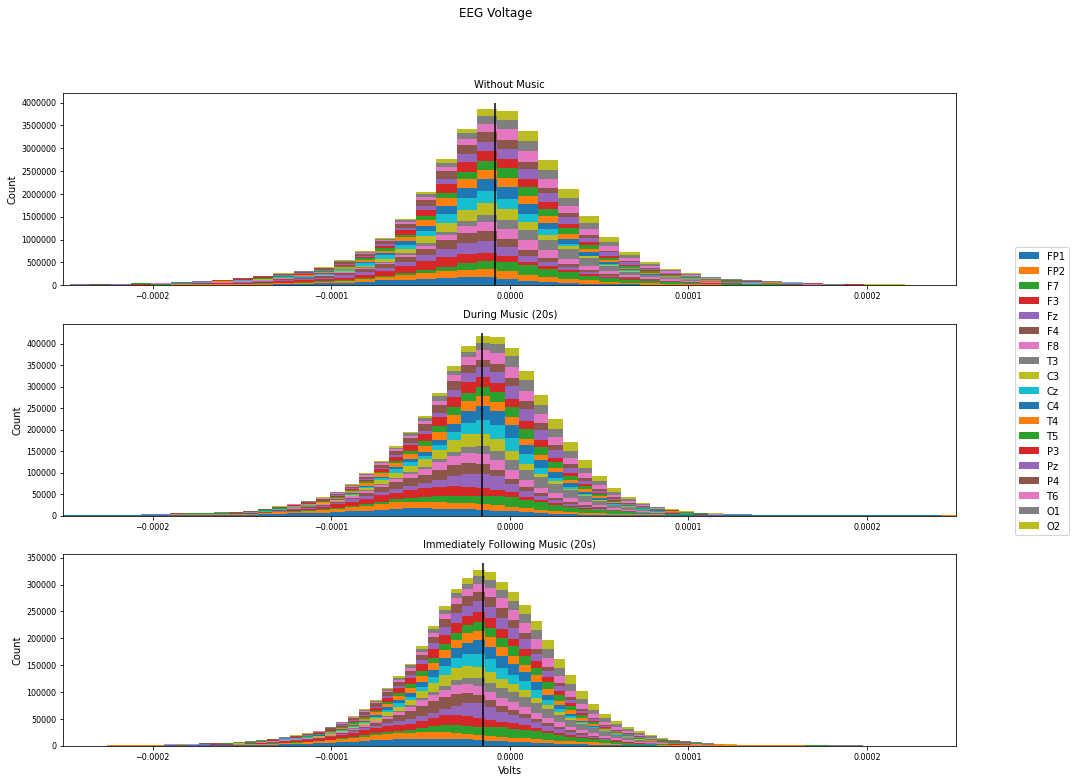

In [6]:
# plot grouped histogram
fig, ax = plt.subplots(3, figsize=(16,12))
fig.suptitle('EEG Voltage')

plot_eeg.eeg_hist(ax[0], control, -0.00025, 0.00025, 'Count', 'Without Music', label=control.columns)
plot_eeg.eeg_hist(ax[1], epochs, -0.00025, 0.00025, 'Count', 'During Music (20s)')
plot_eeg.eeg_hist(ax[2], post_epochs, -0.00025, 0.00025, 'Count', 'Immediately Following Music (20s)')

ax[-1].set_xlabel('Volts')

fig.legend(labels=control.columns, loc='center right')
plt.savefig(f'../img/grouped_eeg_voltages.jpg')

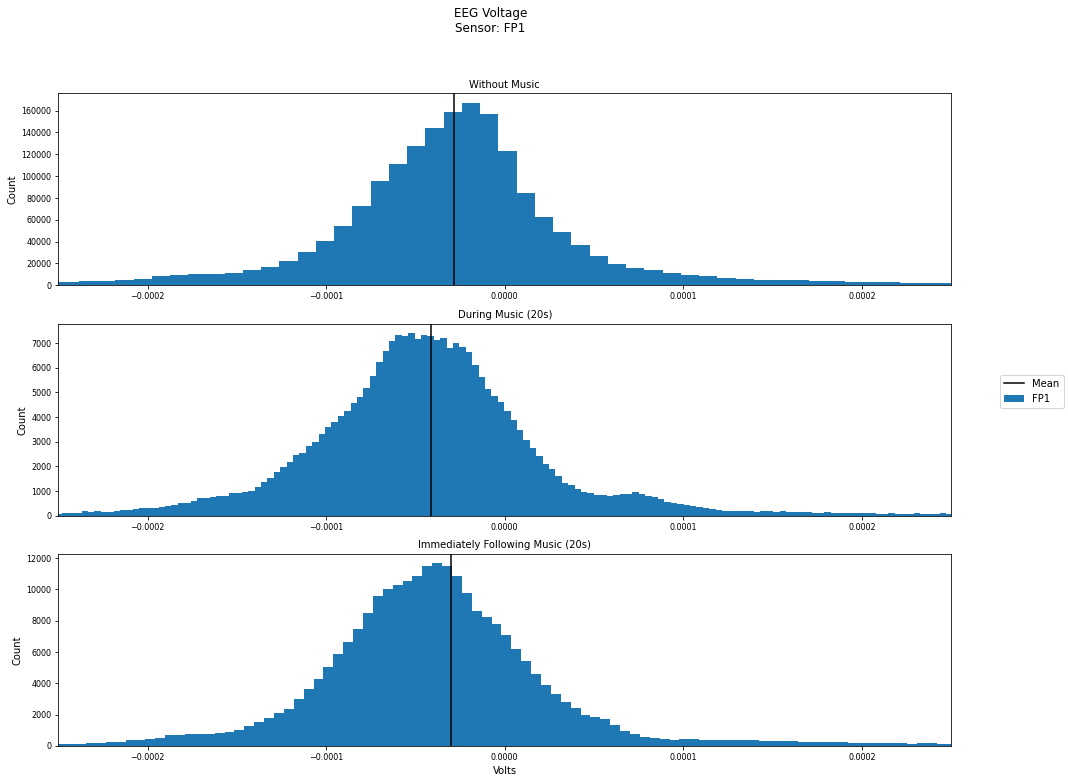

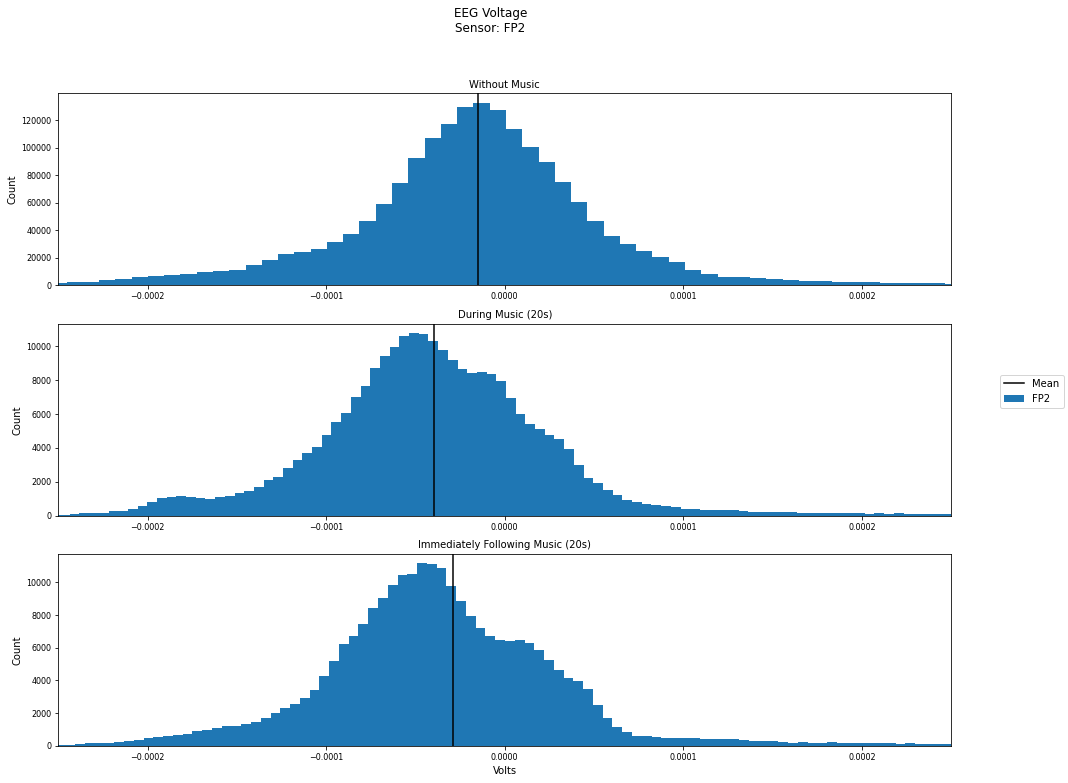

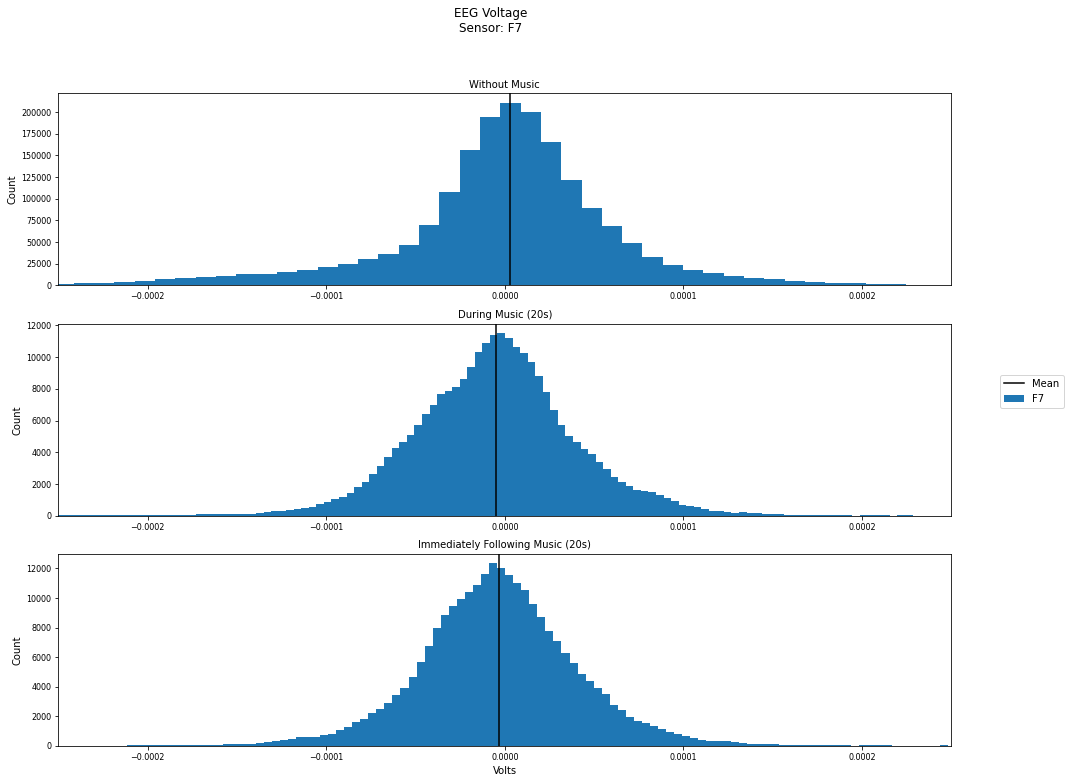

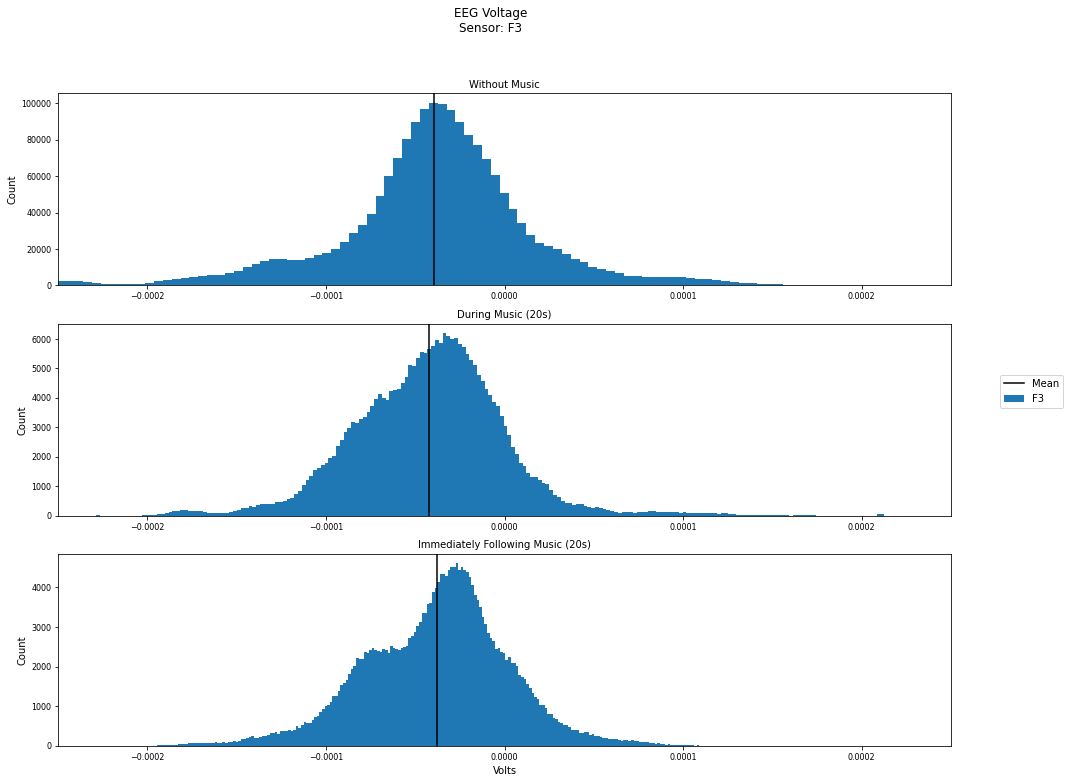

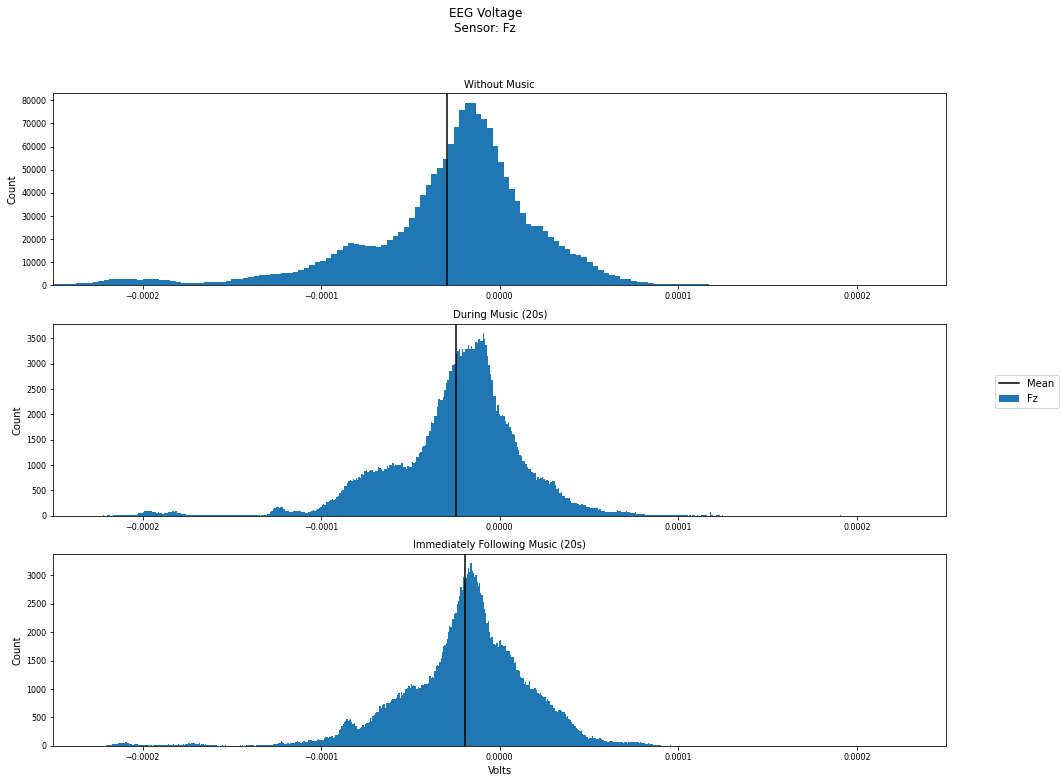

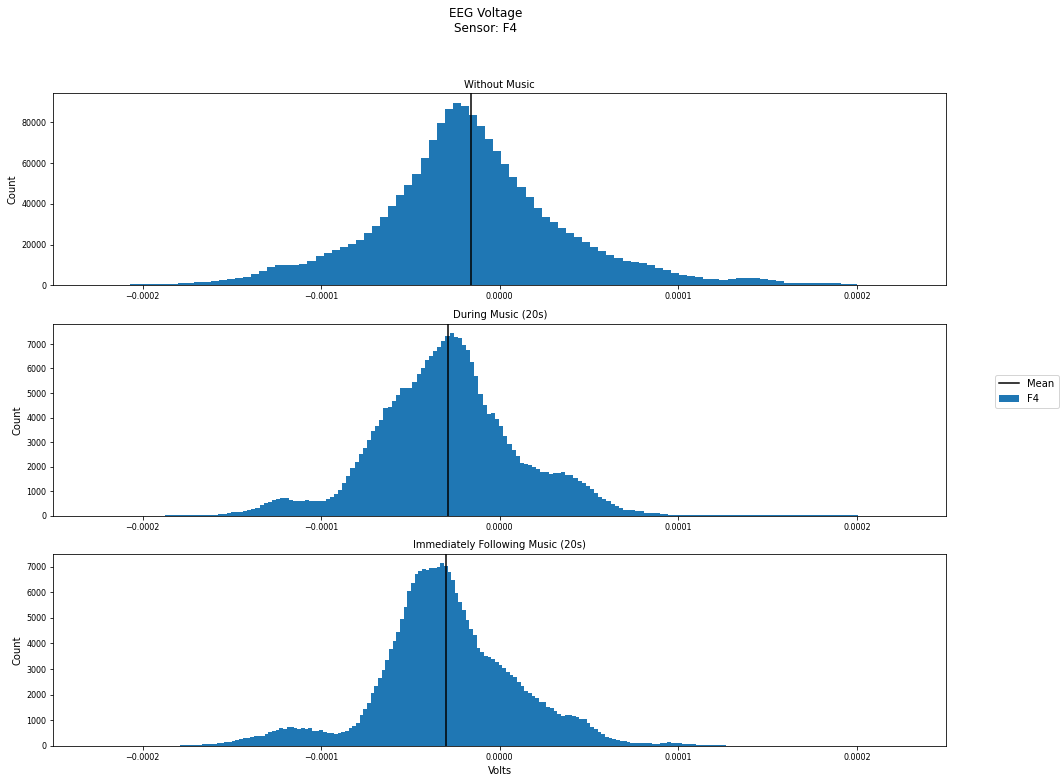

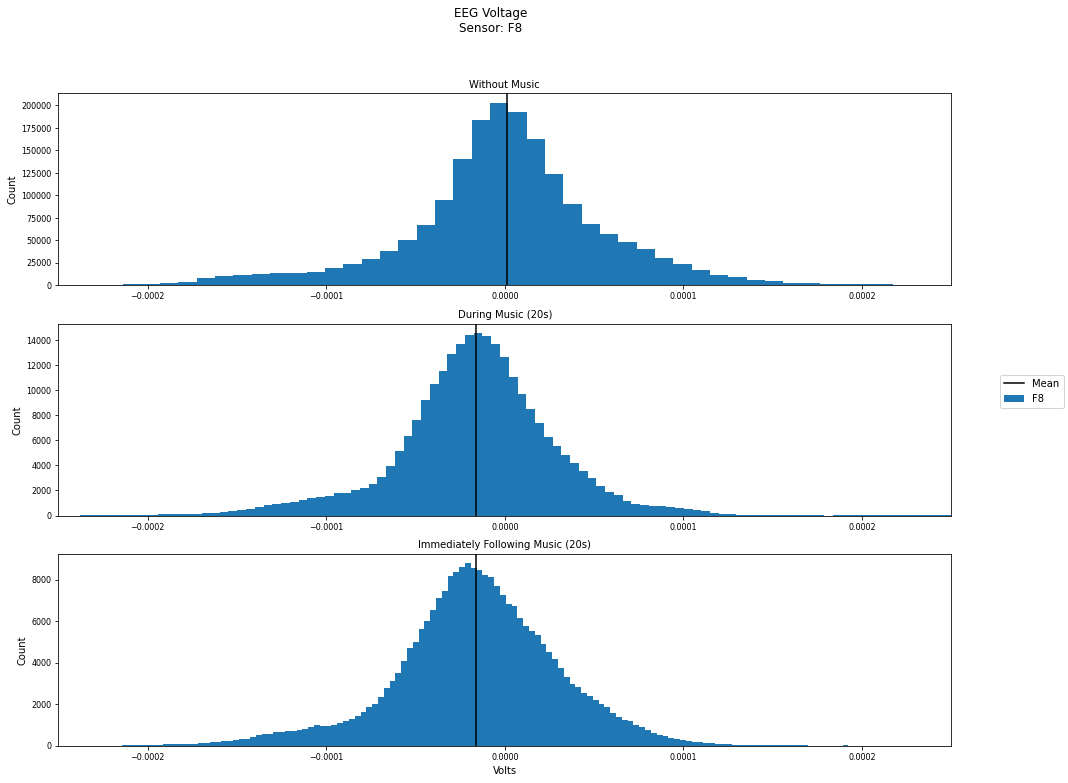

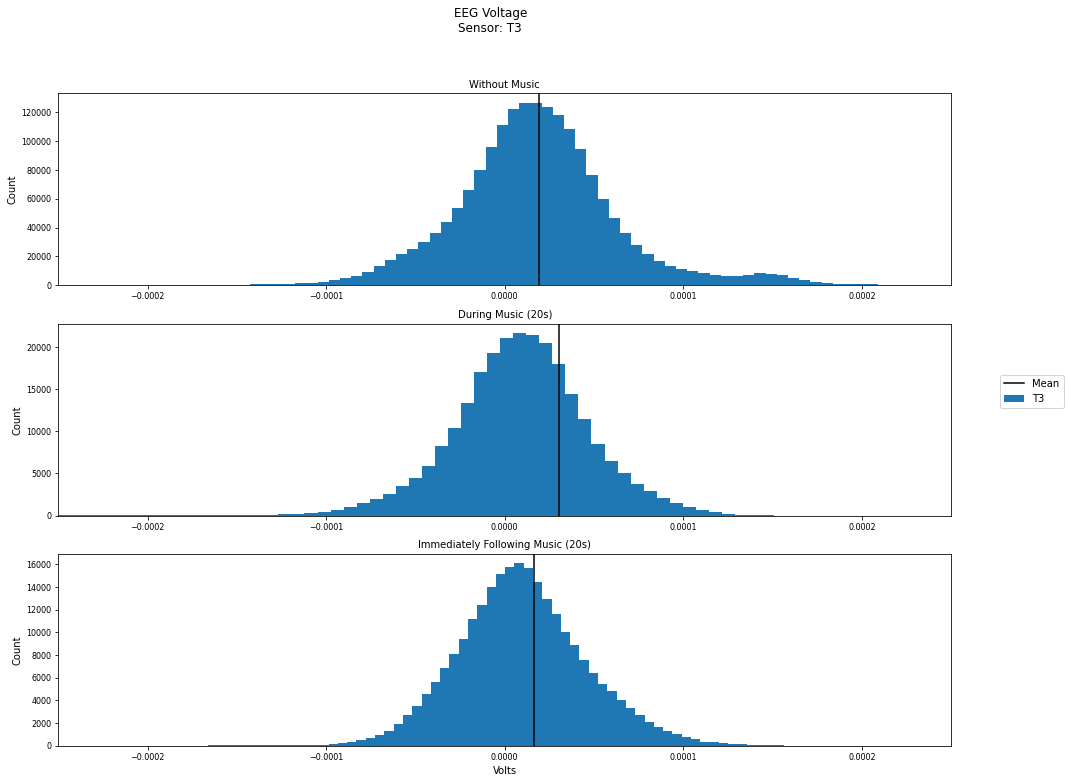

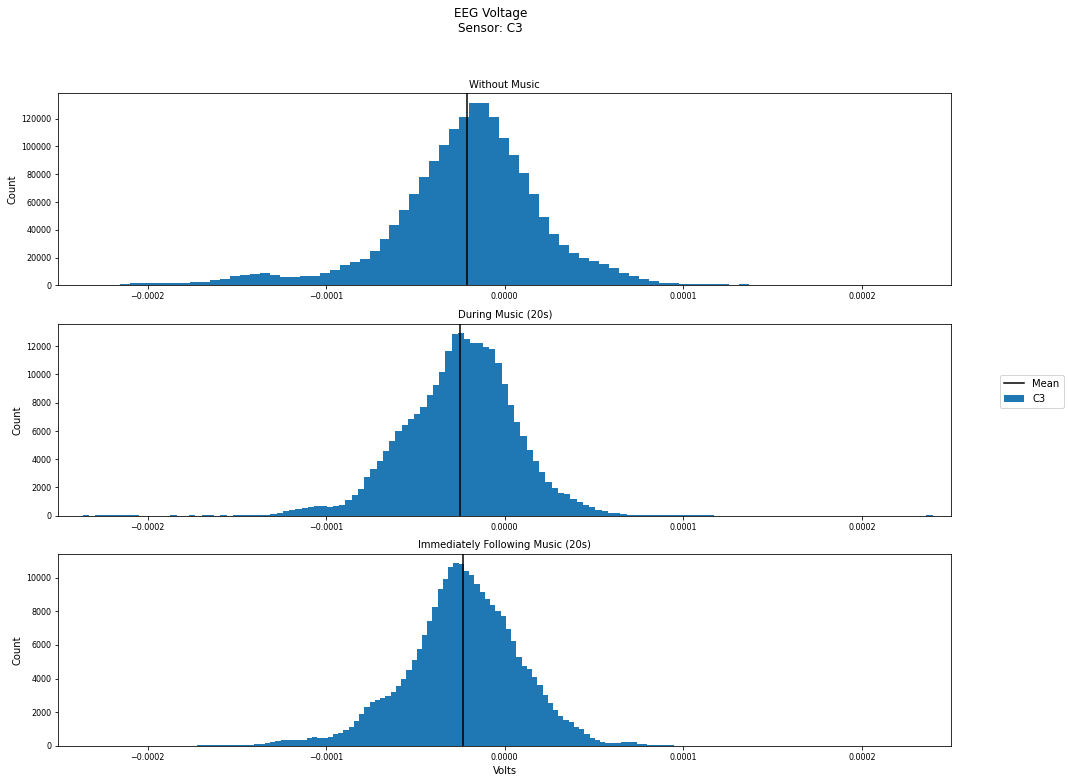

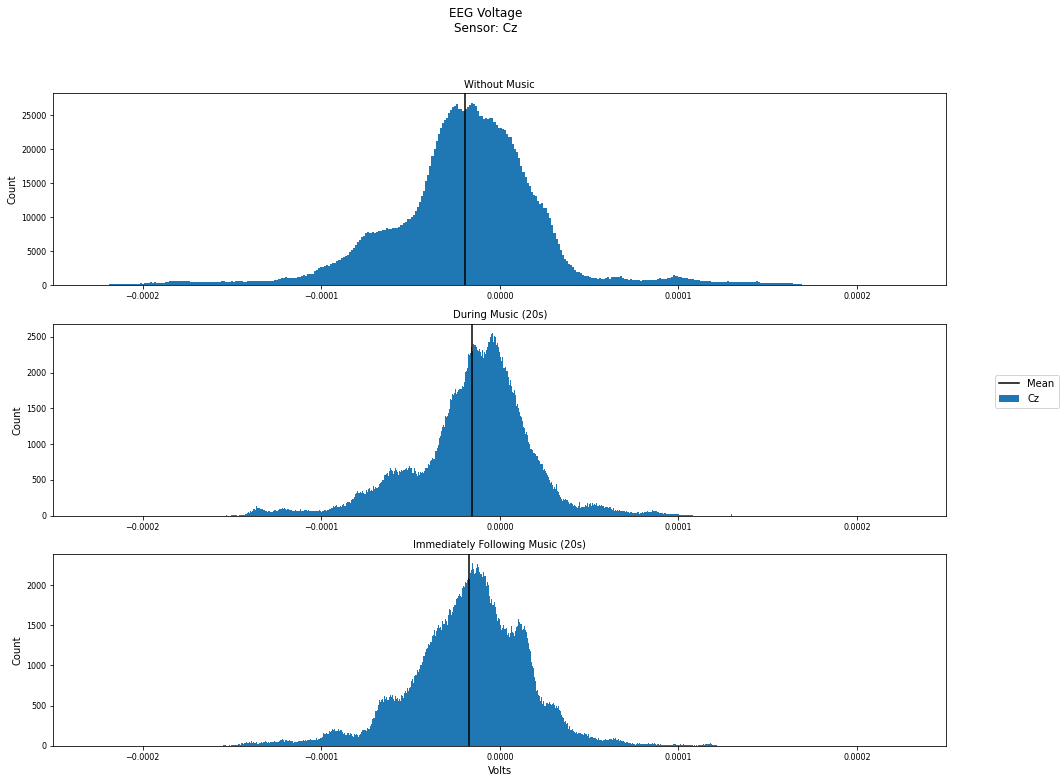

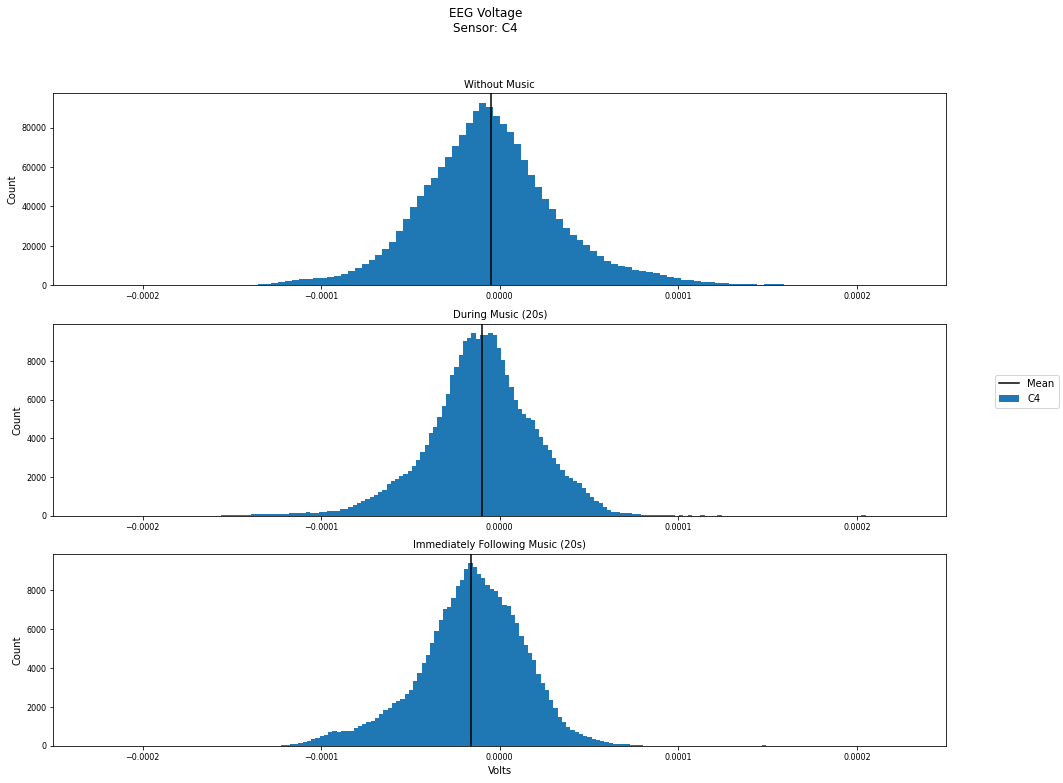

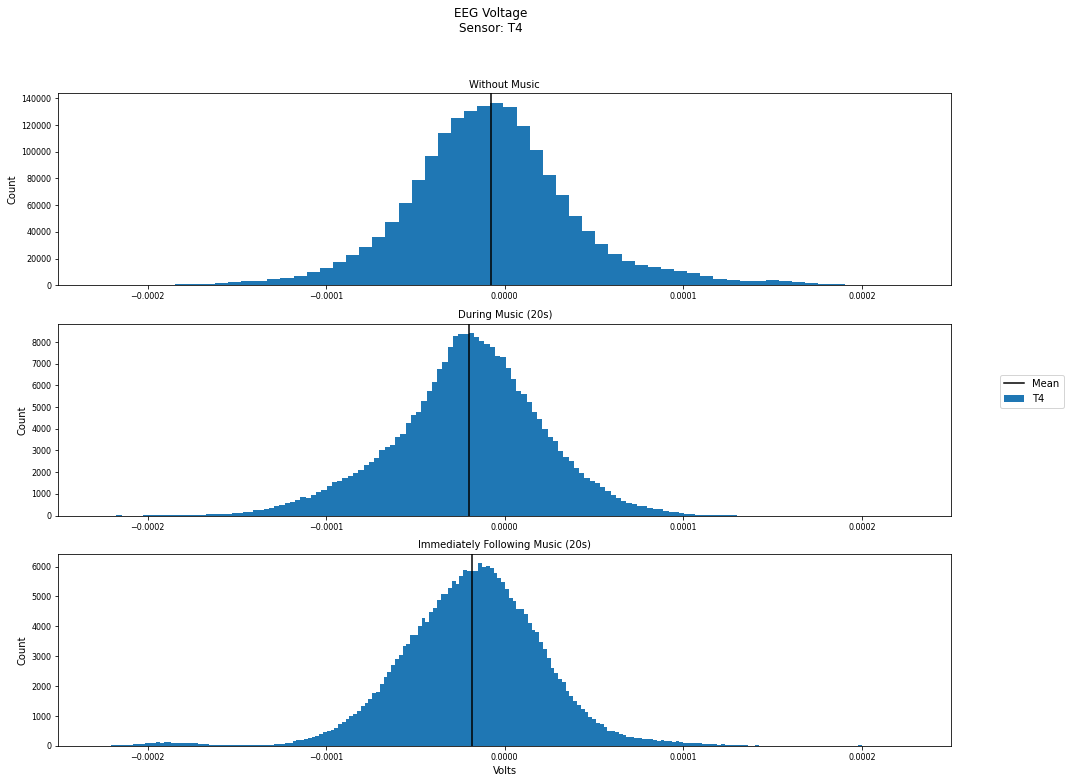

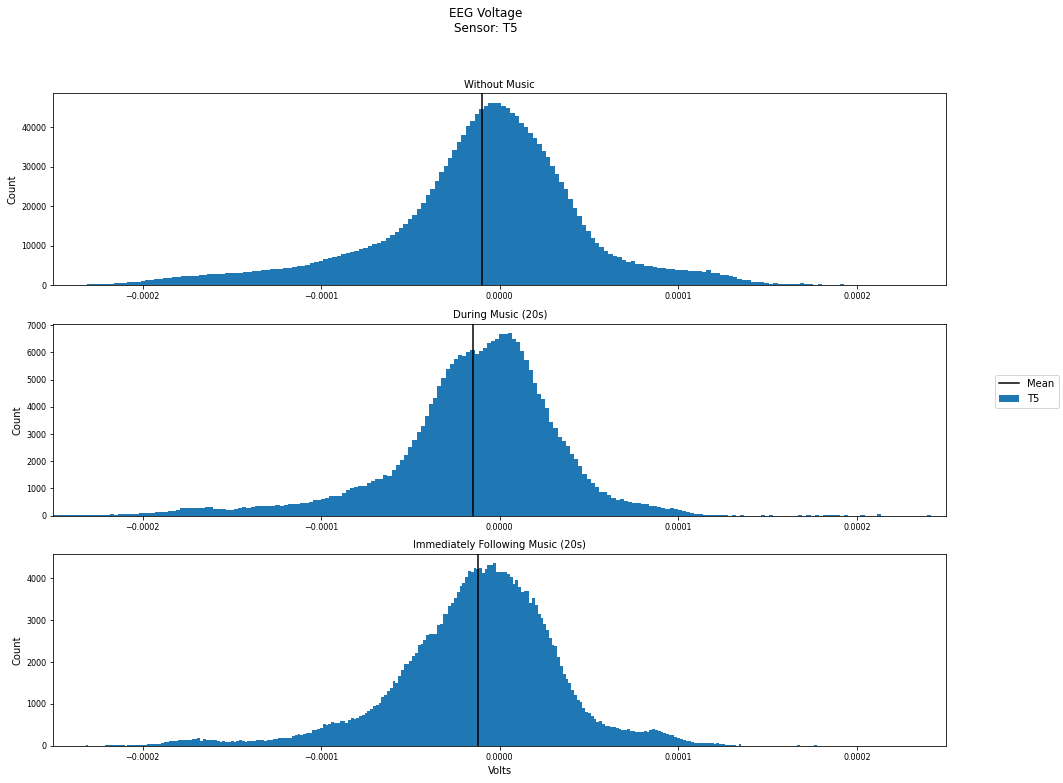

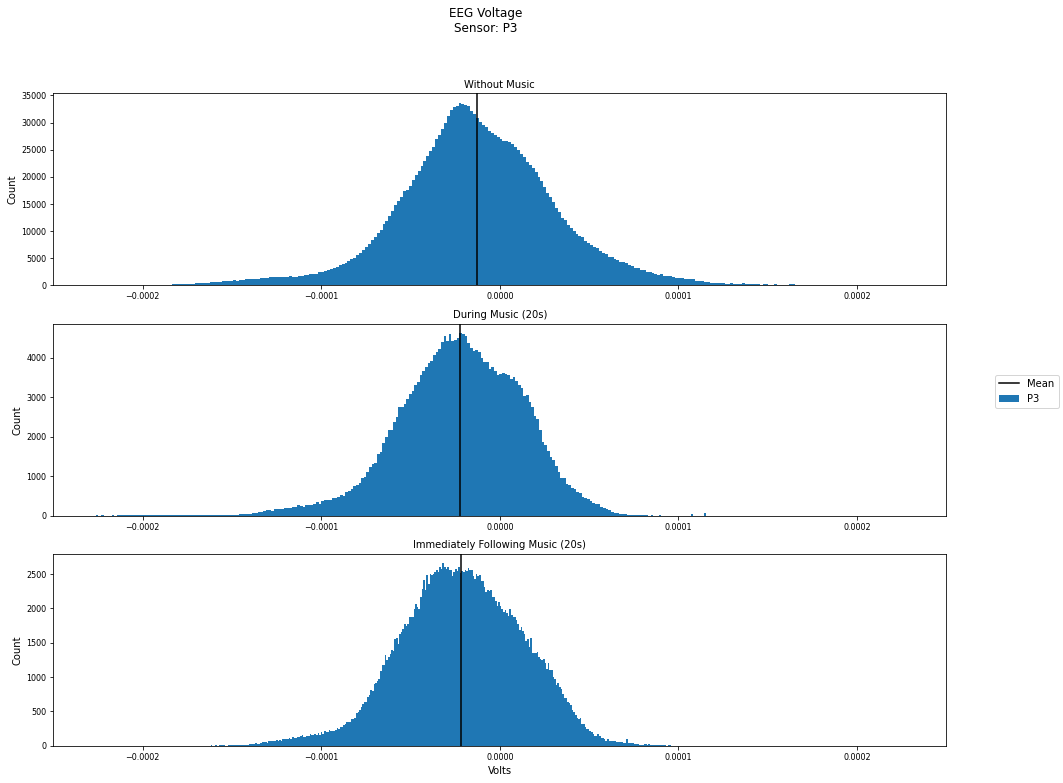

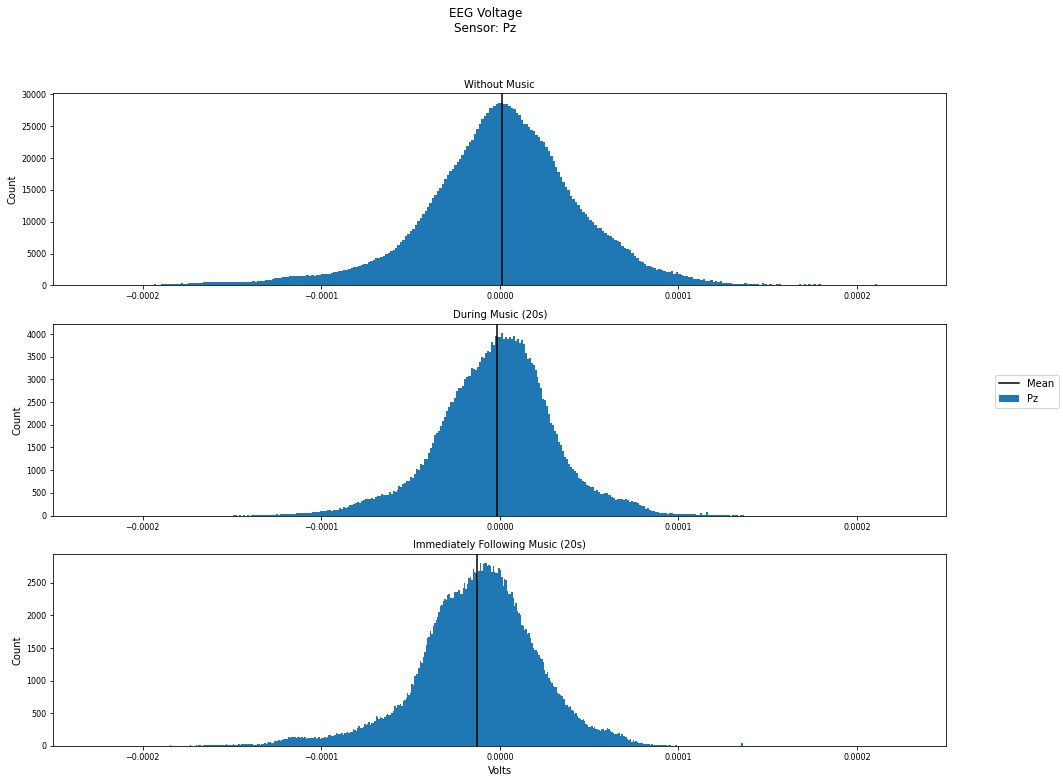

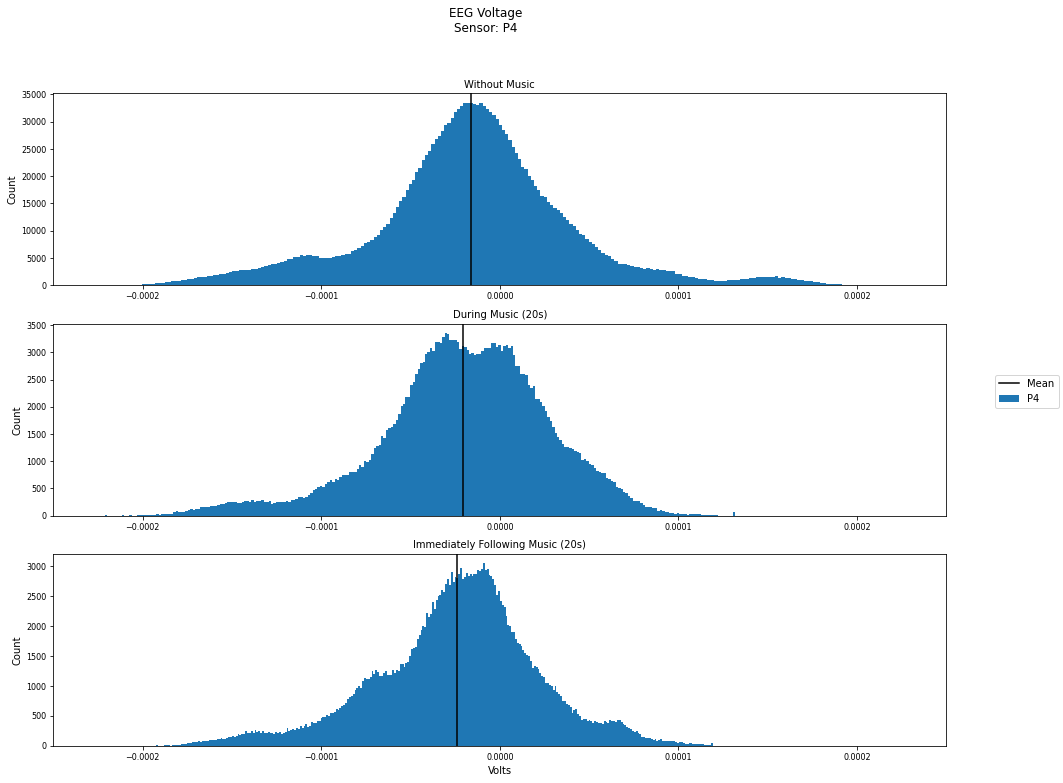

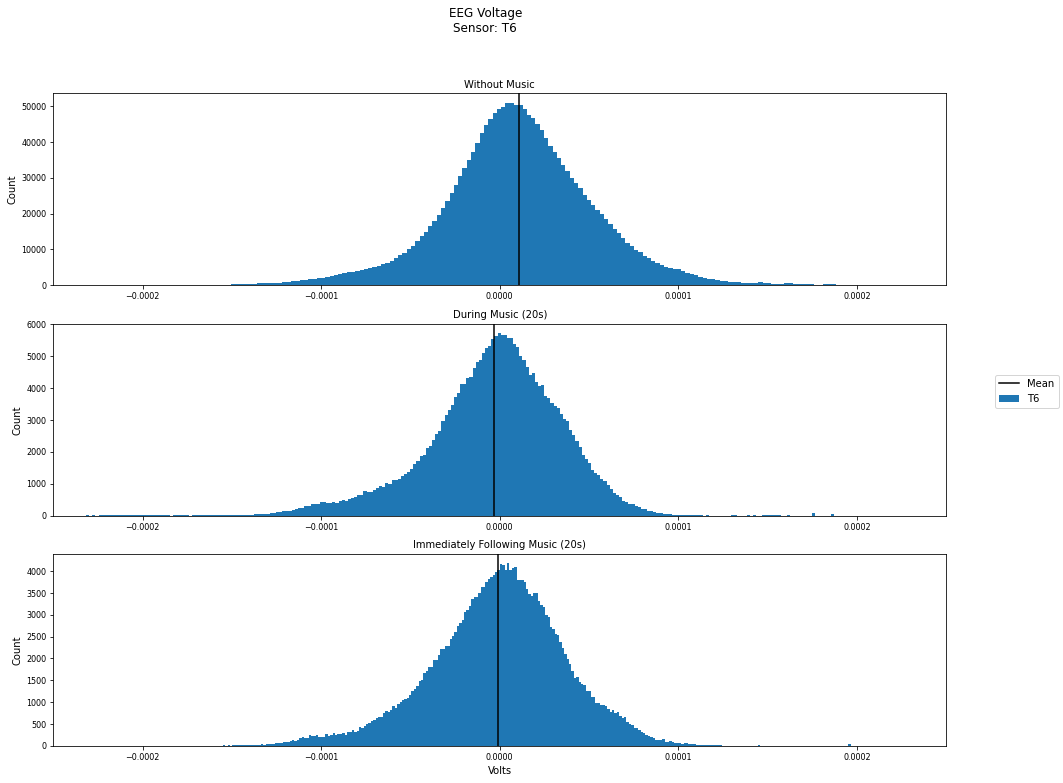

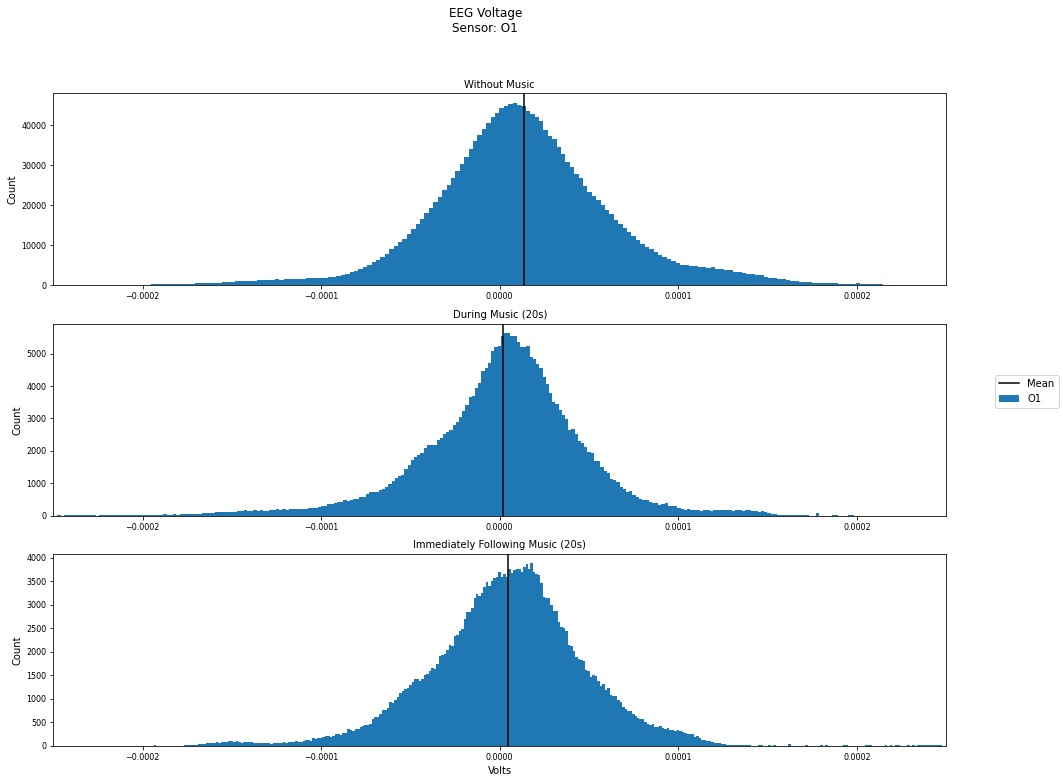

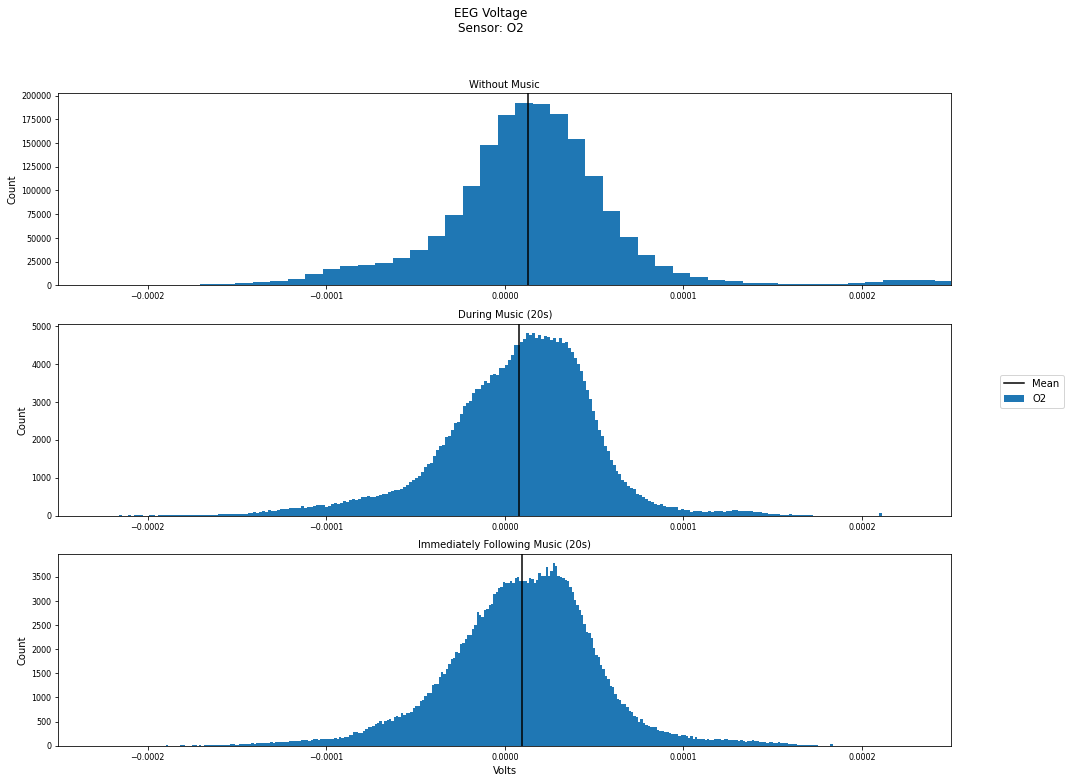

In [5]:
# plot sensor histograms
for col in control.columns:
    fig, ax = plt.subplots(3, figsize=(16,12))
    fig.suptitle(f'EEG Voltage\nSensor: {col}')

    plot_eeg.eeg_hist(ax[0], control[col], -0.00025, 0.00025, 'Count', 'Without Music', label=col, line_label='Mean')
    plot_eeg.eeg_hist(ax[1], epochs[col], -0.00025, 0.00025, 'Count', 'During Music (20s)')
    plot_eeg.eeg_hist(ax[2], post_epochs[col], -0.00025, 0.00025, 'Count', 'Immediately Following Music (20s)')

    ax[-1].set_xlabel('Volts')

    fig.legend(loc='center right')
    plt.savefig(f'../img/{col}_eeg_voltages.jpg')